# Bicycle traffic on rainy days in Münster

This project analyzes the relationship of precipitation and bicycle traffic in the city of Münster, Germany. Münster is a medium-sized city with a lot of students and known for its bicycle-friendliness. At the same time, the region is also known for its high amount of precipitation throughout the year. Therefore, the idea is to investigate whether the available data shows an influence of the precipitation amount and duration on the number of counted bicycles. 

### Data sources

The first data source was provided via the mobilithek, a data platform hosted by the Federal Ministry for Digital and Transport. The city of Münster provides daily, 15-min interval countings of bicycles at certain streets throughout the city.

The second data source was provided by the German Meterological Service (Deutscher Wetterdienst). It provides daily, 10-min intervals of precipitation at weather stations throughout Germany. The precipitations is given with its duration in minutes as well as the amount in millimeter.  

### Data pipeline

The historical rain data from the German Meterological Service is organized by the location and the time windows. The precipitation data for the years 2020, 2021 and 2022 could be downloaded as a .zip file. After extraction, the resulting .txt file was read in as a pandas DataFrame.   
The cycling data from the city of Münster is organized by the location and uploaded as monthly .csv files. The data script automatically iterated through the relevant months and read in the files, creating a second pandas DataFrame.  
Both DataFrames were loaded into separate tables of a SQLite database.  

### Data cleaning

Rain data:  
Erroneous measurments were indicated with a value of "-999", those rows had to be dropped. The rain data was aggregated over every day and separated into rain amounts (in mm) and rain durations (in minutes).  
In some occasions, datapoints indicated a positive number of minutes of rain, but no rain amount in millimeter. These unreasonable rows were also dropped.    
Furthermore, the data was filtered by the day of the week to obtain separate series for weekdays and weekends.  

Cycling data:  
The data was filtered for one specific bicycle counting station. Unfortunately, the data was incomplete such that in some months, there were only data points for a few days. Again, the data was filtered for weekdays and weekends. 

### Data exploration

To get a feeling for the bicycle data, it was filtered by the hour of the day and plotted below: 

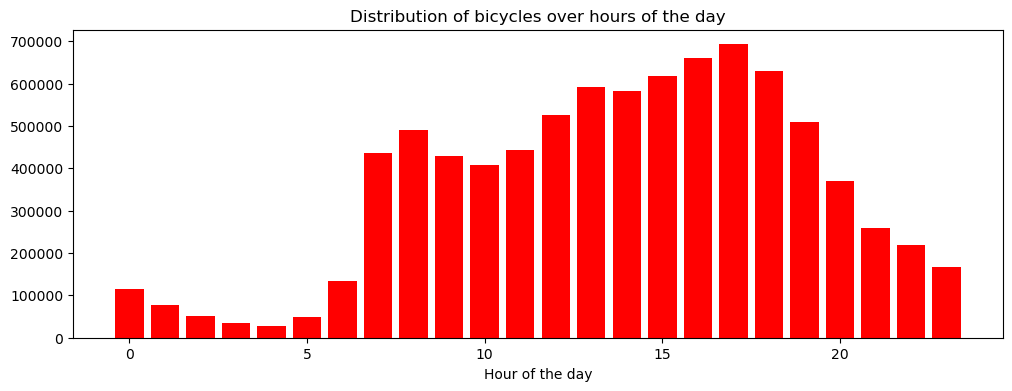

It can be seen that during night times there is little bicycle traffic. It significantly increases at 7am and the peak is reached in the afternoon at 5pm.

To visualize the relationship of rain duration and rain amount, both variables were included into a scatter plot:

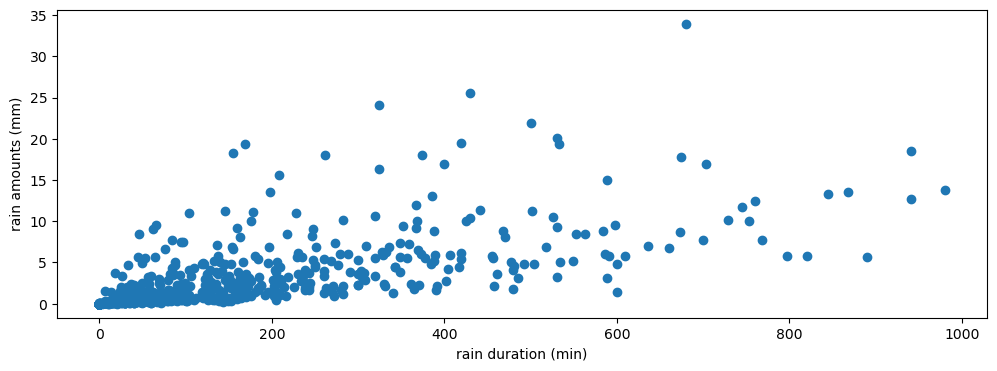

Correlation: $0.74$

It can be seen, that in general, higher durations of rain correlate with higher numbers of rain amounts. But there is also a number of data points of relatively short durations but high amounts of rain. It is also important to note, that the majority of points is clustered in the bottom left corner, which indicates little rain.  

Next, the relationship of rain and bicycles traffic was investigated in two scatter plots. One plots the rain duration against the number of bicycles, the other the rain amounts against the number of bicycles. Every data point corresponds to one day in the years 2020 to 2022. 

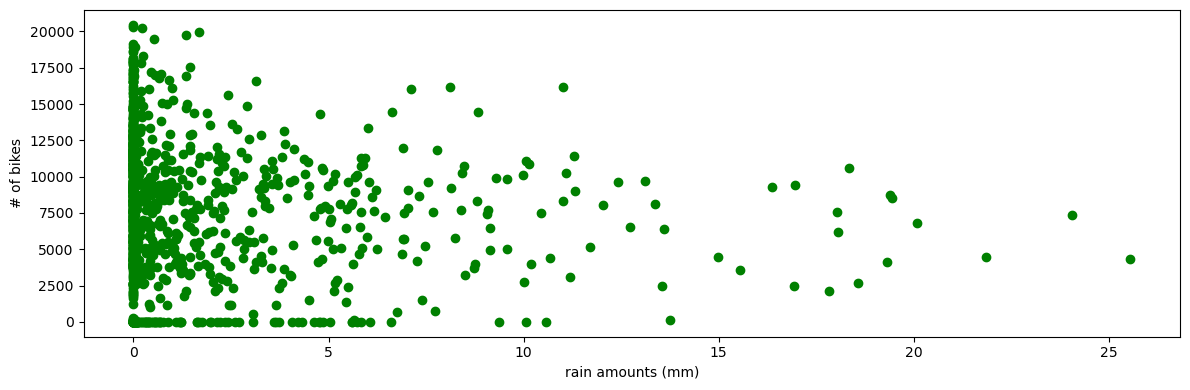

Correlation: $-0.11$

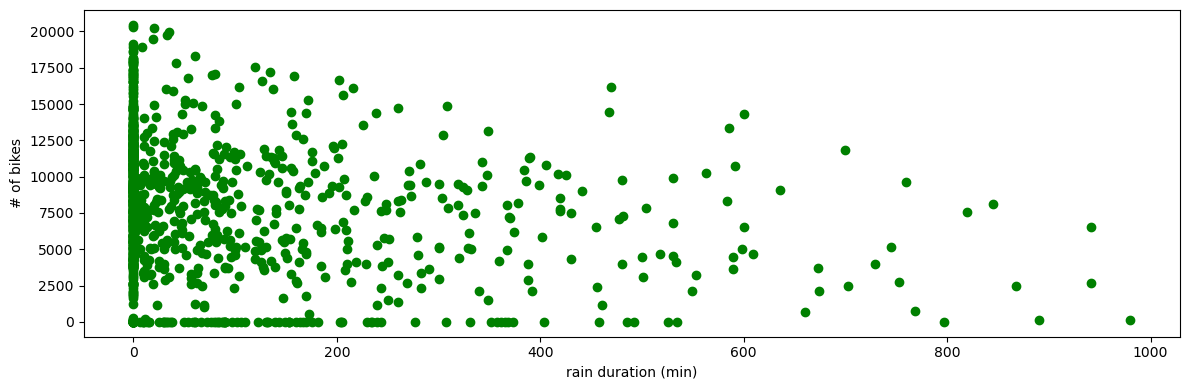

Correlation: $-0.2$

It is difficult to see a clear trend here. Overall, higher amounts and durations of rain are accompanied with lower numbers of bicycles, but the variance is quite high. The correlation is stronger between the rain duration and the number of bicycles.   
There is also a high number of points on the x- and y-axis. This shows that there are days with no rain, but it also shows that there are days with hardly any bikes. The latter is likely to stem from incomplete data.  

To get a different view on the data, the time resolution was changed. For a specific month (here: May 2020), the two plots look as follows: 

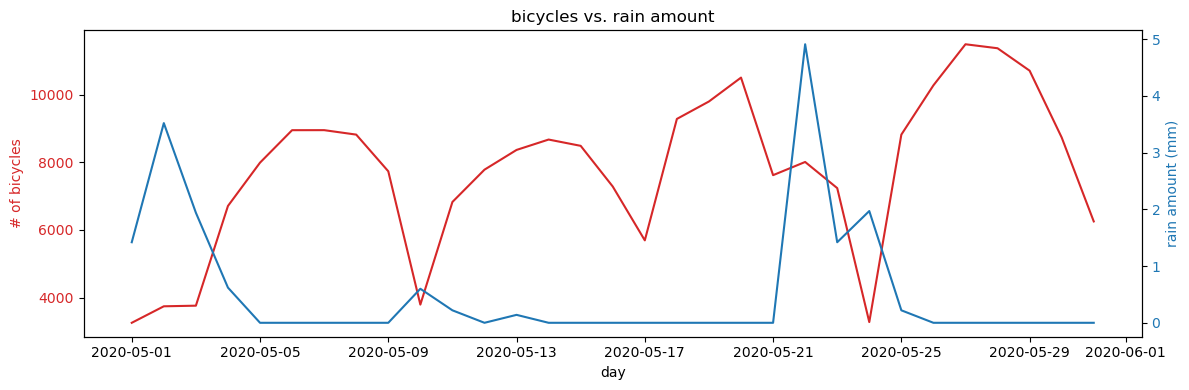

Correlation: $-0.49$

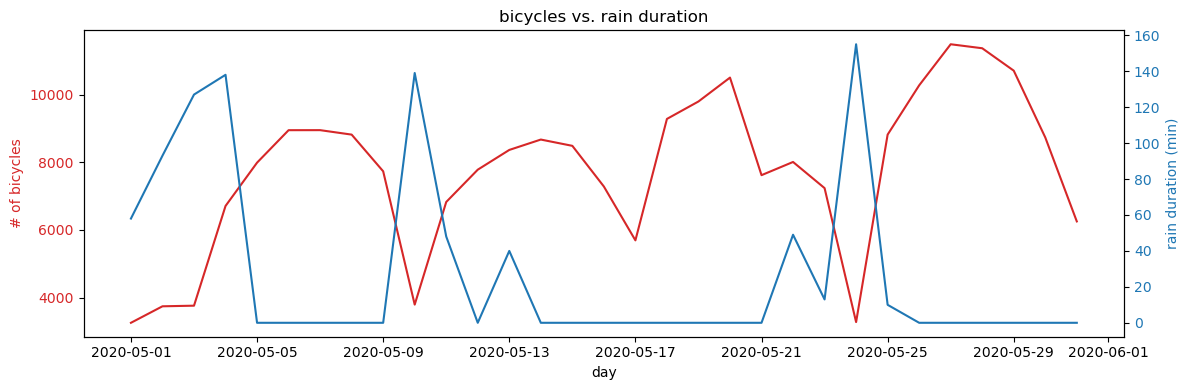

Correlation: $-0.74$

Here, we can see that the number of bicycles is rather low (red curve), when the rain is high (blue curve). And vice-versa, the number of bicycles is rather high (red curve) when the rain is low (blue curve). This tendency can be observed in both plots; there is only little difference between rain duration and rain amount. But again, the correlation is higher between the rain duration and the number of bicycles. May 2020 had the highest correlations of all months in the years 2020 to 2022.        
One point that stands out a little bit is May 17th. On that day, there was no rain, but the number of counted bikes drops significantly. May 17th 2020 was a Sunday.  

This led to the idea, that it might be worth looking at weekdays and weekends separately. Looking only at one type of rain measurements (rain duration), the plots for weekend and weekdays are as follows: 

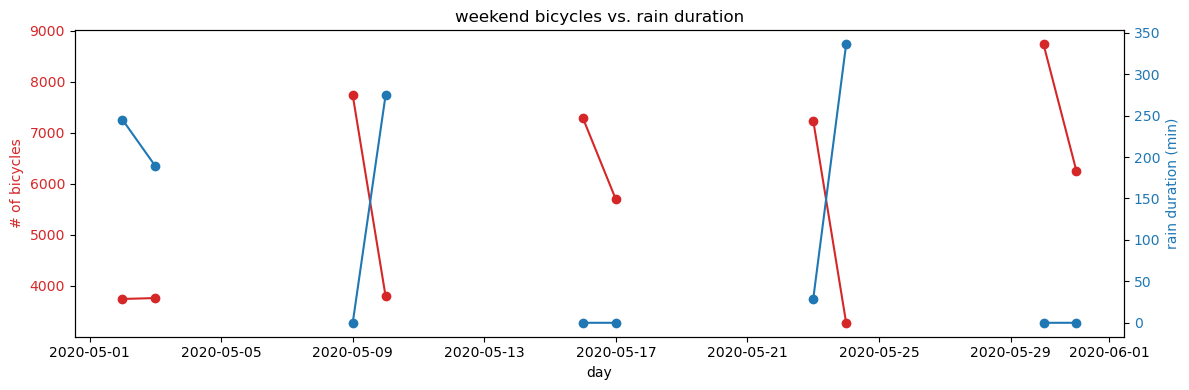

Correlation: $-0.89$

The "crosses" that we can observe on the second and third weekend support the idea that there are less bicycles when the rain is increasing. At the same time, it should be acknowledged that there is generally less traffic on Sundays than on Saturdays.  

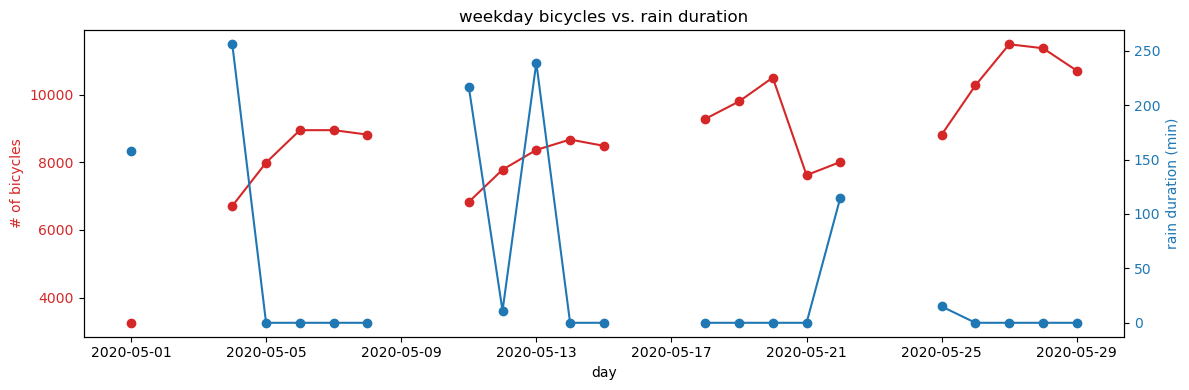

Correlation: $-0.60$

On weekdays, there are also some of these "crosses". And there are occasions, e.g. in the last week, where rain and bicycles are so far apart that they cannot form such a cross. But the trend is the same, namely increasing bicycle traffic when the rain duration goes down.  
One data point that stands out is May 1st. Even though it is not a weekend, the number of bicycles is way lower than on the other days. But May 1st is a public holiday :) 

Lastly, the time axis was set to be even more fine-grained. The idea was to inspect the "rush hour" when most bicycles are on the street. For this, the rain and bicycle data was first filtered for the time between 4pm and 6pm and then aggregated per day. The result looks as follows: 

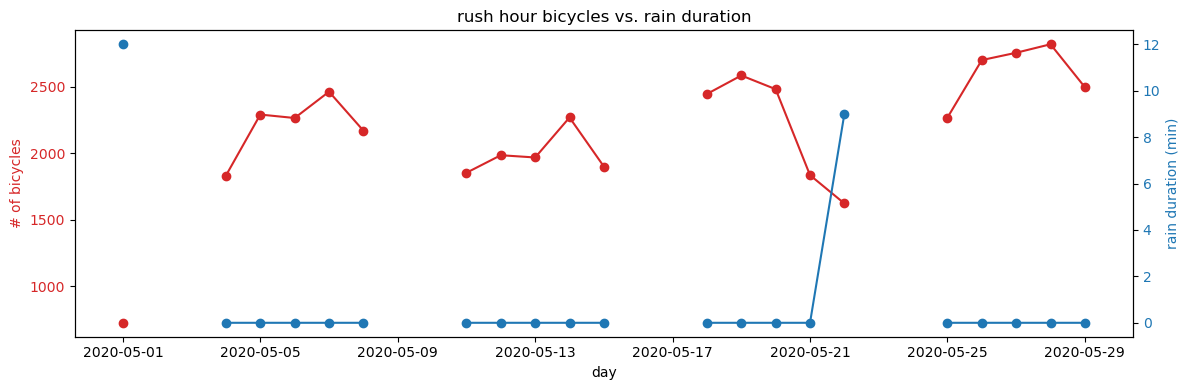

Correlation: $-0.74$

Unfortunately, there is no further insight here as it has not been raining very much during the rush hours.

### Limitations and conclusion

When there is no rain, the relationship of rain and number of bicycles cannot be analyzed. The time windows should therefore not be set too small. But even with larger time windows, this analysis suffers from too little rain data. One reason might be that those data points were eliminated that indicated a rain duration but no rain amount. These irrelegularities were removed, even though they were not one of the measurements marked as "erroneous" in the original dataset.  
But also on the side of the bicycle data, there are some aspects that limit the expressiveness of this analysis. First and foremost the missing data. For some months, there was only data for a handful of days. This had a negative influence on the correlation when looking at the whole data at once. But also when analyzing the rain for individual days, the missing data was a problem. The resampling summed up the rain durations or amounts and could not notice missing data points.  
With respect to the research question it can be said, that the bigger picture only displays a slight negative correlation between the number of counted bicycles and rain duration or amount. But when looking on the data for May 2020 we could see that there was a lower number of bicycles whenever it was raining. And the high negative correlation supports the hypothesis that the rain has an influence on the number of counted bicycles in Münster. 

### Summary

This project aimed at analyzing the relationship between rain and the number of bicycles on a certain street in Münster, Germany. The research question was whether the available data shows an influence of the precipitation amount and duration on the number of counted bicycles. The analysis started out by looking at all the available data at once. Namely the rain duration or amount was plotted against the number of bicyles for each day in the years 2020 to 2022. But there was little correlation between the rain and the bicycles. Looking at a selected month, one could see the inverse relationship and the correlation was significant. To get more stable numbers for the counted bicycles, the time axis was further refined to distinguish the traffic on weekdays from the weekends. The resulting correlation on the weekends was even higher, but this has to be taken with caution as the dataset size was rather small. Finally, the time axis was even further refined by constraining the traffic and rain data to the "rush hour" between 4pm and 6pm on weekdays. But with this high resolution, there was not enough rain for further insights.    
Overall, the research question could be answered positively, the precipitation has a negative influence on the number of bicycles. The size of the effect largely depends on the chosen time resolution and the incomplete data. 